In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# To suppress numeric values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format

# To display all charts against a white background
plt.style.use('seaborn-whitegrid')

### Step 1. Loading Data

In [2]:
df_customer = pd.read_csv('./data/customer.csv')

In [3]:
df_customer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210002 entries, 0 to 210001
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  210002 non-null  int64  
 1   first_name   210002 non-null  object 
 2   last_name    210002 non-null  object 
 3   city         210002 non-null  object 
 4   state_code   210002 non-null  object 
 5   zip          210002 non-null  int64  
 6   country      210002 non-null  object 
 7   latitude     210002 non-null  float64
 8   longitude    210002 non-null  float64
 9   opportunity  210002 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 16.0+ MB


In [4]:
df_customer.head()

,customer_id,first_name,last_name,city,state_code,zip,country,latitude,longitude,opportunity
0,108437513,Coleman,Barbu,Mayaguez,PR,680,USA,64.13,-145.75,30000
1,621672267,Ramu,Chier,Mayaguez,PR,680,USA,18.20,-67.14,10000
2,243948535,Sanders,Groome,Ponce,PR,717,USA,64.13,-145.75,20000
3,259246539,Manon,Scheyer,Ponce,PR,717,USA,64.13,-145.75,20000
4,791622718,Kole,Etshman,Ponce,PR,717,USA,64.13,-145.75,20000


In [5]:
df_customer.shape

(210002, 10)

In [6]:
df_customer.describe()

,customer_id,zip,latitude,longitude,opportunity
count,"210,002.00","210,002.00","210,002.00","210,002.00","210,002.00"
mean,"434,686,963.78","47,191.44",38.23,-90.08,"99,016.46"
std,"253,819,572.13","30,181.93",5.14,16.32,"176,502.07"
min,"100,000,339.00",680.00,13.48,-159.53,"10,000.00"
25%,"216,209,503.75","19,610.00",34.15,-96.80,"20,000.00"
50%,"387,263,215.00","45,209.00",39.77,-85.17,"43,000.00"
75%,"613,023,215.25","75,240.00",41.67,-77.21,"90,000.00"
max,"999,992,774.00","99,901.00",64.86,144.75,"3,248,000.00"


In [7]:
df_txn = pd.read_csv('data/txn.csv')

In [8]:
df_txn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   txn_id       1048575 non-null  int64  
 1   txn_date     1048575 non-null  object 
 2   customer_id  1048575 non-null  int64  
 3   symbol       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   redemptions  1048575 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 48.0+ MB


In [9]:
df_txn.head()

,txn_id,txn_date,customer_id,symbol,sales,redemptions
0,422909780,5/2/2016,992808564,AFNIX,"13,687.83",0.00
1,422909781,5/2/2016,261785827,GABSX,0.00,"-4,286.23"
2,422909782,5/2/2016,389127962,VTISX,"4,153.98",0.00
3,422909783,5/2/2016,101692476,IMLAX,"27,452.30",0.00
4,422909784,5/2/2016,327754553,MAPCX,"6,433.14",0.00


In [10]:
df_txn.shape

(1048575, 6)

In [11]:
df_txn.describe()

,txn_id,customer_id,sales,redemptions
count,"1,048,575.00","1,048,575.00","1,048,575.00","1,048,575.00"
mean,"423,434,067.00","434,602,172.41","5,476.56","-2,413.16"
std,"302,697.67","253,895,845.15","7,183.11","3,153.61"
min,"422,909,780.00","100,000,339.00",0.00,"-12,821.61"
25%,"423,171,923.50","216,021,455.00",0.00,"-4,439.99"
50%,"423,434,067.00","387,358,569.00",0.00,-138.19
75%,"423,696,210.50","612,835,970.00","10,088.88",0.00
max,"423,958,354.00","999,992,774.00","29,186.85",0.00


In [12]:
df_mutual_fund = pd.read_json('data/mutual_fund.json')

In [13]:
df_mutual_fund.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23783 entries, 0 to 23782
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     23783 non-null  object 
 1   name       23778 non-null  object 
 2   tna        23749 non-null  float64
 3   ms_rating  21976 non-null  float64
 4   size       22674 non-null  object 
 5   exp_ratio  23567 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


In [14]:
df_mutual_fund.head()

,symbol,name,tna,ms_rating,size,exp_ratio
0,AAAAX,DWS RREEF Real Assets Fund - Class A,"2,979,347,456.00",3.00,Large,0.01
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,"195,348,944.00",3.00,Large,0.01
2,AAAFX,American Century One Choice Blend+ 2015 Portfo...,"25,946.00",NaN,Large,0.01
3,AAAGX,Thrivent Large Cap Growth Fund Class A,"2,078,606,848.00",4.00,Large,0.01
4,AAAHX,American Century One Choice Blend+ 2015 Portfo...,"25,946.00",NaN,Large,0.00


In [15]:
df_mutual_fund.shape

(23783, 6)

In [16]:
df_mutual_fund.describe()

,tna,ms_rating,exp_ratio
count,"23,749.00","21,976.00","23,567.00"
mean,"4,924,192,363.80",3.10,0.01
std,"21,097,647,864.75",1.08,0.01
min,10.00,1.00,0.00
25%,"144,583,360.00",2.00,0.01
50%,"644,328,320.00",3.00,0.01
75%,"2,453,408,768.00",4.00,0.01
max,"753,409,982,464.00",5.00,0.12


### Step 2. Exploratory Data Analysis (EDA)

#### 1. Sales and redemptions by customer


In [17]:
# Sales and redemptions by Customer - restricted to Top 10 by Sales
df_sales_by_cust = df_txn.groupby(['customer_id']).sum()[['sales', 'redemptions']].sort_values(by='sales', ascending=False).head(10)
print(df_sales_by_cust.head())
print()
print(df_sales_by_cust.shape[0])

                           sales          redemptions
customer_id                                          
891691385             164,884.72           -13,434.32
639423248             160,459.98            -5,178.92
664905096             155,053.84           -37,579.62
355625942             152,412.51           -21,029.89
606787030             149,244.00           -25,843.33

10


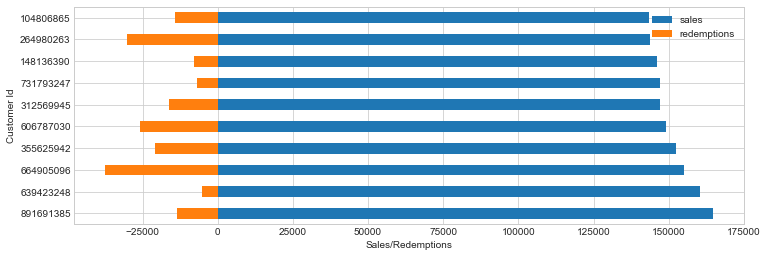

In [21]:
df_sales_by_cust.plot(kind='barh', stacked=True, figsize=(12, 4)).legend(loc='upper right')
plt.title='Sales and Redemptions by Customer'
plt.xlabel('Sales/Redemptions')
plt.ylabel('Customer Id');

#### 2. Sales and redemptions by mutual fund

In [22]:
# Sales and Redemptions by Top 10 Mutual Funds
df_sales_by_fund = df_txn.groupby(['symbol']).sum()[['sales', 'redemptions']].sort_values(by='sales', ascending=False).head(10)
print(df_sales_by_fund.head())
print()
print(df_sales_by_fund.shape[0])

                      sales          redemptions
symbol                                          
MSDCX            856,314.66          -207,858.66
LCRRX            826,716.30          -211,586.65
FFQZX            825,552.52          -248,619.59
BSPIX            801,182.43          -210,506.32
CMACX            797,674.56          -272,037.97

10


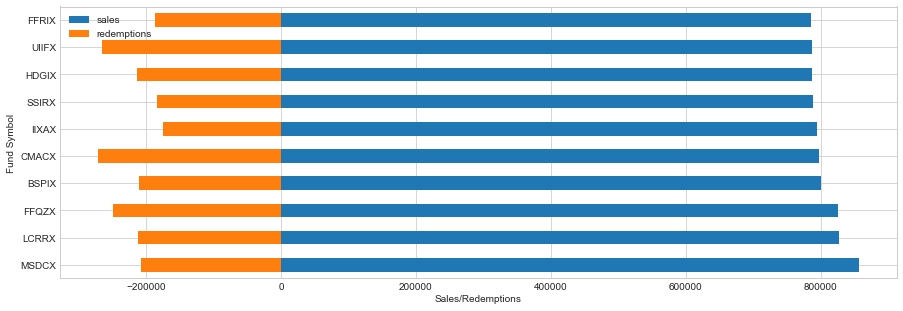

In [30]:
df_sales_by_fund.plot(kind='barh', stacked=True, figsize=(15, 5)).legend(loc='upper left')
plt.title='Sales and Redemptions by Customer'
plt.xlabel('Sales/Redemptions')
plt.ylabel('Fund Symbol');


#### 3. Sales and redemptions by customer and mutual fund

In [34]:
df_sales_by_cust_fund = df_txn.groupby(['customer_id', 'symbol']).sum()[['sales', 'redemptions']].sort_values(by=['customer_id', 'symbol', 'sales'], ascending=False)
print(df_sales_by_cust_fund.head(10))
print()
print(df_sales_by_cust_fund.shape[0])

                                  sales          redemptions
customer_id symbol                                          
999992774   VSAGX                  0.00            -6,088.40
            HNVIX             10,591.61                 0.00
            FMGAX                  0.00            -8,398.58
999989840   PCBKX              7,548.54                 0.00
            FARFX                  0.00            -4,002.59
            CRMVX             17,287.08                 0.00
            COMVX              7,430.91                 0.00
            BIACX             10,440.11                 0.00
999984817   WIISX              8,742.14                 0.00
            SASMX                  0.00            -5,974.41

1048343


#### 4. A deeper look at fund attribute-based aggregations

In [36]:
# Sales and redemptions by MS Rating
df_sales_by_ms_rating = pd.merge(left=df_txn, right=df_mutual_fund, on='symbol')[['ms_rating', 'sales', 'redemptions']].groupby(['ms_rating']).sum([['sales', 'redemptions']])
df_sales_by_ms_rating.head()

,sales,redemptions
ms_rating,,
1.00,"390,448,899.42","-170,238,228.73"
2.00,"1,120,082,048.39","-491,015,532.96"
3.00,"1,966,911,888.18","-866,222,003.72"
4.00,"1,301,368,936.06","-577,776,674.22"
5.00,"567,949,882.52","-249,320,470.32"


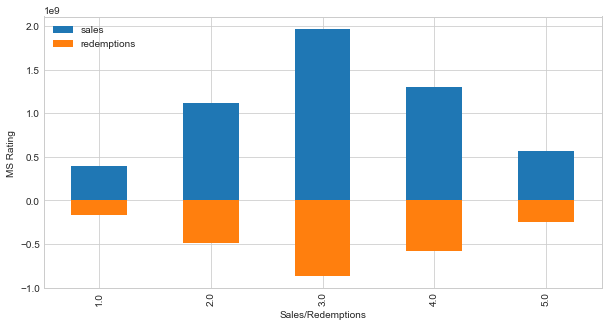

In [39]:
df_sales_by_ms_rating.plot(kind='bar', stacked=True, figsize=(10, 5)).legend(loc='upper left')
plt.title='Sales and Redemptions by Morning Star Rating'
plt.xlabel('Sales/Redemptions')
plt.ylabel('MS Rating');

In [40]:
# Sales and redemptions by Size
df_sales_by_size = pd.merge(left=df_txn, right=df_mutual_fund, on='symbol')[['size', 'sales', 'redemptions']].groupby(['size']).sum([['sales', 'redemptions']])
df_sales_by_size.head()

,sales,redemptions
size,,
Large,"3,202,668,833.37","-1,403,907,288.82"
Medium,"1,335,869,935.18","-591,358,063.86"
Small,"950,395,378.67","-422,789,418.60"


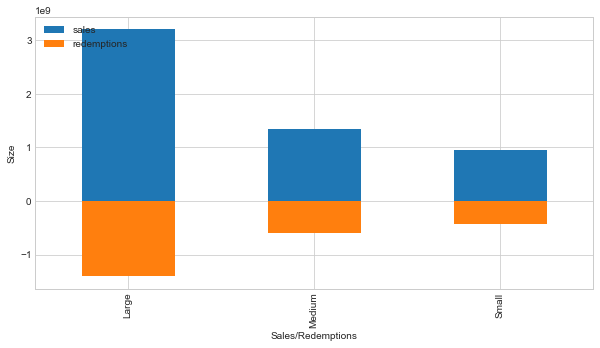

In [41]:
df_sales_by_size.plot(kind='bar', stacked=True, figsize=(10, 5)).legend(loc='upper left')
plt.title='Sales and Redemptions by Size'
plt.xlabel('Sales/Redemptions')
plt.ylabel('Size');

#### 5. A deeper look at customer attribute-based aggregations

In [42]:
# Sales and redemptions by Customer and Customer Opportunity
df_sales_by_cust_opp = pd.merge(left=df_txn, right=df_customer, on='customer_id')[['customer_id', 'opportunity', 'sales', 'redemptions']].groupby(['customer_id', 'opportunity']).sum([['sales', 'redemptions']])
df_sales_by_cust_opp.head()

,,sales,redemptions
customer_id,opportunity,,
100000339,50000,"7,795.32","-8,257.66"
100001423,50000,"41,082.73","-8,562.18"
100001837,125000,"14,997.14","-24,064.01"
100002544,16000,"47,259.76","-13,202.98"
100002551,150000,"17,507.63","-9,250.09"


In [45]:
# Sales and redemptions by geographic location
df_sales_by_state = pd.merge(left=df_txn, right=df_customer, on='customer_id')[['state_code', 'opportunity', 'sales', 'redemptions']].groupby(['state_code']).sum([['opportunity', 'sales', 'redemptions']]).sort_values(by='sales', ascending=False)
df_sales_by_state.head()

,opportunity,sales,redemptions
state_code,,,
CA,13323219000,"616,614,584.18","-269,705,211.35"
NY,20221846000,"556,695,243.27","-243,567,910.87"
FL,6071339000,"380,353,671.91","-168,723,368.15"
TX,5796772000,"352,309,140.40","-153,953,892.17"
IL,6471983000,"266,361,252.58","-117,187,857.74"


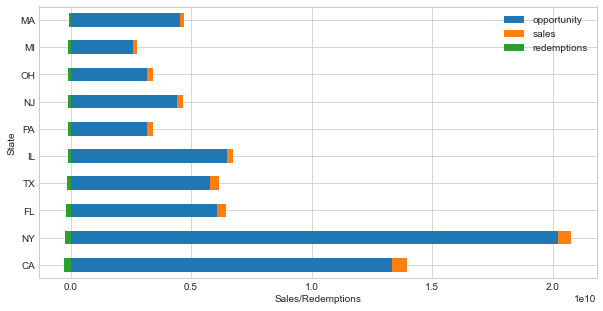

In [48]:
df_sales_by_state.head(10).plot(kind='barh', stacked=True, figsize=(10, 5)).legend(loc='upper right')
plt.title='Sales and Redemptions by State'
plt.xlabel('Sales/Redemptions')
plt.ylabel('State');